# Тема № 14.  Деревья решений и случайный лес

## Дерево принятия решений
На предыдущих занятиях мы познакомились с некоторыми методами машинного обучения - линейной и логистической  регрессиями. У этих, и у многих других методов, есть недостаток - результаты метода слабо понятны обычному человеку, или как говорят *слабо интерпретируемы*.

Действительно как объяснить человеку что

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) > 5 это слон, а 

0.5 * (рост) + 0.9 * (вес) - 0.013 * (есть хвост) < 5 это собака?

Как вообще можно складывать величины разной размерности рост в метрах и вес в килограммах, на уроках физики нам говорили что так нельзя, а здесь в линейной регрессии именно так и происходит. Хоть эти методы могут давать хорошие результаты, но объяснимость их очень маленькая. 

Человек думает и принимает решения по другому. ЕСЛИ сегодня выходной ТОГДА я не пойду в школу. ЕСЛИ мне поставят оценку больше 3 ТОГДА я буду хорошим учеником ИНАЧЕ плохим. 

Подобным образом на основе правил вида "ЕСЛИ ... ТОГДА ... ИНАЧЕ" (IF...THEN...ELSE...) рассуждает человек и это ему понятно. Вот бы и компьютер заставить думать также. Хм, но именно так мы пишем программы для компьютера, знакомая конструкция любого языка программирования, не правда ли?

Одного правила для принятия решения может быть не достаточно - тогда можем применить несколько правил, например:
```
ЕСЛИ оценка больше 4
ТОГДА отдыхать
ИНАЧЕ ЕСЛИ оценка больше 3
----- ТОГДА немножко подучить
----- ИНАЧЕ ЕСЛИ оценка больше 2
----------- ТОГДА учиться очень усердно
----------- ИНАЧЕ придется отчисляться
```
Раз мы можем написать такие правила для нашего решения, тогда что мешает это сделать компьютеру?

Для любой задачи, например классификации чего-нибудь, можем построить такие правила в виде некоторой иерархии. Пример на рисунке ниже.

Используя некоторую информацию об автовладельцах - атрибуты или признаки - страховая компания принимает решение страховать или нет такого автовладельца.

![img](https://drive.google.com/uc?id=1XuKxi0uZNJOSk9GqKDMgi7-ILXv9MYrO)

Изображения иерархии подобных правил напоминают изображение дерева (перевернутого вверх корнем), поэтому так и называются - **дерево принятия решений**. Места разветвлений - узлы, конечные узлы, которые уже не разветвляются - листья. Самый первый (верхний) узел - корень дерева. Это просто названия и никакой связи с биологическими деревьями нет.  В принципе деревья могут быть разной структуры, но мы будем говорить только о деревьях с ответами правил типа ДА\НЕТ.

## Обучение (создание) дерева

Когда дерево уже кем-то создано, мы можем им пользоваться без проблем, проверяя правила и таким образом выискивая подходящее решение.

Но дерево нужно создать, обучить. Для этого придумано множество методов, мы рассмотрим только один метод ["CART"](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms)        (Classification and Regression Trees) реализованный в библиотеке `sklearn`. 

Пусть, как и обычно в задачах классификации с учителем, имеется L обучающих векторов примеров входов \\(x^l\\) с n компонентами (атрибутами) каждый и столько же меток y описывающих класс, к которому относится каждый из примеров. Будем рассматривать только правила с ответами ДА/НЕТ и условиями вида \\(x_i^l \leq t_i\\),  t - некоторые пороги для атрибутов.

Для построения каждого узла дерева возьмем один из атрибутов (компонент входа) и сравним его с порогом. Разделим все обучающие примеры Q этого узла на две части, выборки, в одну Ql (левую) войдут примеры у которых условие \\(x_i^l \leq t_i\\) выполняется, а в другую Qr (правую) примеры у которых условие не выполняется. 
Посчитаем для этих двух выборок некоторую величину H(), называемую *неопределенность* (impurity, еще называют ее "загрязненность", "неточность", "критерий") и общую неопределенность узла

G = (число примеров в Ql)/(общее число примеров в Q)* H(Ql)+ (число примеров в Qr)/(общее число примеров в Q)* H(Qr).

И сделаем это для всех атрибутов и всех возможных значений порога этих атрибутов. Выберем такой атрибут и порог, для которых G минимально. По ним и будем окончательно строить узел.

Начиная с корня, в котором присутствуют все обучающие примеры \\(x^l\\), будем создавать новые и новые узлы, постепенно разбивая набор этих примеров на меньшие части по выбранным атрибутам и порогам пока не останется в каждом узле по одному примеру, или не выполнятся другие критерии останова обучения.

Так и получится дерево решений.

Реализовано несколько разных критериев *H()*. Такой критерий должен давать маленькое число, если мы смогли за одно разделение отделить классы полностью (идеальное разделение) и большое, если число примеров разного класса в разделенных множествах примерно одинаково (бесполезное разделение), например:

А) Для задач классификации на K классов:

1) *Неопределенность Джини*: для каждого класса считаем долю (p) примеров этого класса во всех примерах (их \\(N_m\\) штук) узла m (метки *y* представлены целыми числами от 0 до K-1) и считаем H() как 

$ p_k=\frac{1}{N_m}* \sum_{x_i \in Q_m} I(y_i=k), I=1\ если \ совпадает, \ 0 \ если  \ не \  совпадает \\
\\ H = \sum_{k} p_k*(1-p_k) \\ $

2) *Энтропия*:

$ H = - \sum_{k} p_k*log(p_k) \\ $

3) *Ошибка классификации*: 

$ H = 1-max(p_k) \\ $

Б) Для задач регрессии обычно используют среднеквадратичную ошибку:
сначала ищут среднее значение меток y в примерах узла m

$ y_{mean} = \frac{1}{N_m} \sum_{i\in N_m} y_i \\ $

а потом ищут среднеквадратичную ошибку

$ H =  \frac{1}{N_m} \sum_{i\in N_m} (y_i-y_{mean})^2 \\ $

Прекрасную анимацию создания дерева можно найти [здесь](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

Давайте реализуем классификатор на основе дерева для примеров [ирисов Фишера](https://ru.wikipedia.org/wiki/Ирисы_Фишера#Описание). В библиотеке `sklearn` есть модуль `tree` с различными функциями для деревьев, используем от туда `DecisionTreeClassifier()` для создания классификатора. Синтаксис его аналогичен другим классификаторам: команда `fit()` для обучения, `predict()` для расчета выходов. Для отображения дерева используем команду `plot_tree()` (она вернет и текстовое описание дерева), которая покажет для каждого узла выбранный атрибут (как индекс входного массива), порог, число примеров в узле общее (samples) и по классам (values), значение критерия (здесь gini).   
Параметры дерева решений:

`Критерий (criterion)`: Этот параметр определяет, как будет измеряться примесь. Значением по умолчанию является «Джини», но вы также можете использовать «энтропию» в качестве метрики для примесей.

`Разветвитель (splitter)`: Вот как дерево решений ищет функции для разделения. Значение по умолчанию установлено на «лучший». То есть для каждого узла алгоритм учитывает все функции и выбирает наилучшее разбиение. Если вы решите установить параметр разделителя на «случайный», то будет рассматриваться случайное подмножество объектов. Разделение будет затем выполнено наилучшей функцией в случайном подмножестве. Размер случайного подмножества определяется параметром max_features. 

`Максимальная глубина (max_depth)`: Этот параметр определяет максимальную глубину дерева. В нашем случае мы используем глубину два, чтобы сделать наше дерево решений. По умолчанию установлено значение none. Это часто приводит к переопределенным деревьям решений. Параметр глубины является одним из способов, которыми мы можем упорядочить дерево или ограничить его рост.

`min_samples_split`: Минимальное количество выборок, которое должен содержать узел, чтобы рассмотреть расщепление. Значение по умолчанию равно двум. Вы можете использовать этот параметр, чтобы упорядочить ваше дерево.

`min_samples_leaf`: Минимальное количество выборок необходимо считать листовым узлом. Значение по умолчанию установлено в единицу. Используйте этот параметр, чтобы ограничить рост дерева.

`max_features`: Количество функций, которые следует учитывать при поиске лучшего разделения. Если это значение не установлено, дерево решений будет учитывать все функции, доступные для наилучшего разделения В зависимости от вашего приложения, часто бывает полезно настроить этот параметр. 



In [1]:
from sklearn.datasets import load_iris # примеры данных 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz# модуль для деревьев
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz
from sklearn import tree

data = pd.read_csv("../dataset/car7.csv")
X = data.drop('MSRP', axis=1)
y = data['MSRP']


# проверка на новых образцах
# sample_1=int(clf.predict([[5,5,1,3]]))
# print(f"Проверка на новом образце {data.target_names[sample_1]}")

In [2]:
X

,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Number of Doors_2,Number of Doors_3,Number of Doors_4,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive
0,4,8,0.334665,3,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4,8,0.299700,3,6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,8,0.299700,3,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,8,0.229770,3,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,8,0.229770,3,6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,8,0.299700,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
11187,0,8,0.299700,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
11188,0,8,0.299700,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
11189,0,7,0.299700,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [3]:
y

0        1
1        1
2        1
3        0
4        1
        ..
11186    1
11187    1
11188    1
11189    1
11190    0
Name: MSRP, Length: 11191, dtype: int64

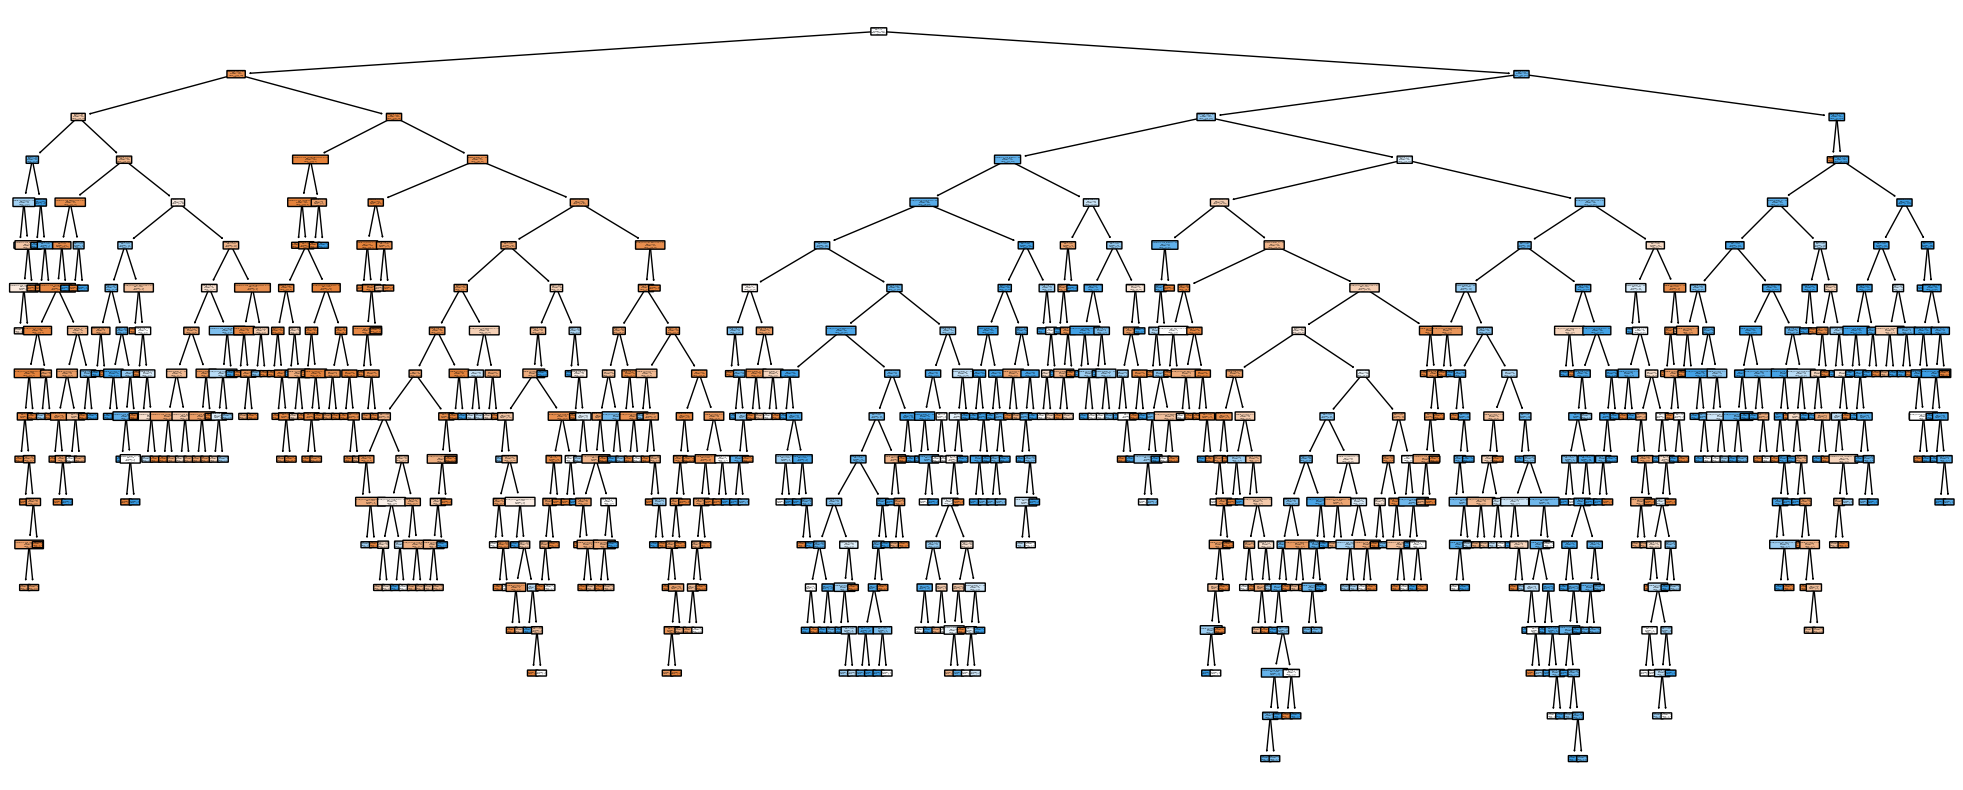

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую # тестируем для другой точки

clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()

На Рисунке вы можете видеть, что каждая коробка содержит несколько характеристик. Давайте начнем с описания содержимого самого верхнего узла, чаще всего называемого корневой узел, Корневой узел находится на глубине нуля, Depth 0, Узел - это точка в дереве решений, где задается вопрос. Это действие делит данные на меньшие подмножества.

### `graphviz`
Для более наглядного отображения деревьев рекомендуется использовать библиотеку [`graphviz`](https://graphviz.org/), которая позволяет сохранять и отображать деревья в специальном формате **DOT**.


Примечание: Нужно установить и библиотеку и ее исполняемые файлы, не забыть прописать путь к ней в системную переменную PATH.

In [5]:
dot_data = export_graphviz(clf, feature_names=X.columns, class_names=['0', '1'],out_file=None) # конвертируем в DOT (в переменную или в файл) 
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("cars") # отображаем в файл (по умолчанию pdf)

'cars.pdf'

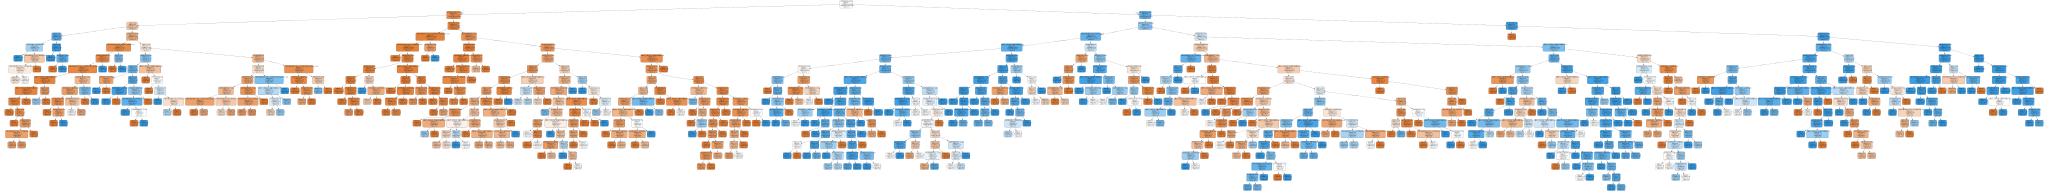

In [6]:
dot_data = export_graphviz(clf, out_file=None,  # можем указать дополнительные опции конвертации
                     feature_names=X.columns, class_names=['0', '1'],
                     filled=True, rounded=True,  # прочие детали отображения
                     special_characters=True)  #
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

Функция `export_text()` из того же модуля `sklearn.tree` позволяет отобразить дерево в форматированном текстовом виде правил ЕСЛИ...ТОГДА...ИНАЧЕ  

In [7]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf) # переводим дерево в текстовую строку
print(r) # печатаем

|--- feature_2 <= 0.22
|   |--- feature_1 <= 8.50
|   |   |--- feature_0 <= 8.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- feature_0 <= 5.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.50
|   |   |   |   |   |--- feature_2 <= 0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  0.19
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  8.50
|   |   |   |--- feature_2 <= 0.19
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_3 <= 3.50
|   |   |  

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

precision, recall, thresholds = roc_curve(y_test.ravel(), y_score.ravel())
precision, recall, thresholds

(array([0.        , 0.07016925, 1.        ]),
 array([0.        , 0.90942029, 1.        ]),
 array([inf,  1.,  0.]))

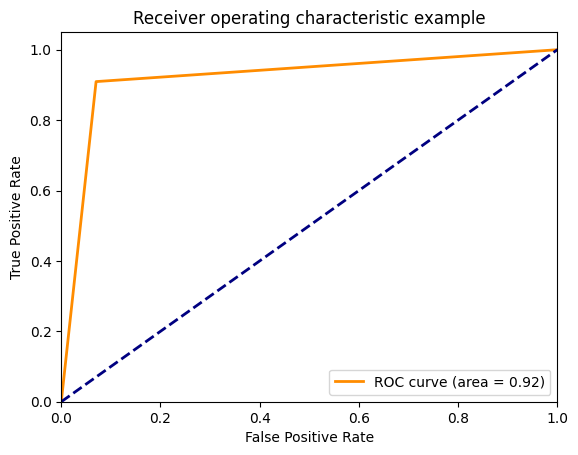

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test,y_score )
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [10]:
from sklearn import metrics
# оценка точности модели
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2836
           1       0.93      0.91      0.92      2760

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596



# Случайный лес
Дерево решений может оказаться очень большим, со многими уровнями, и его считать придется очень долго. Это не эффективно. Можно ограничить *глубину* дерева (число уровней), но тогда пострадает качество решения задачи. Выход - использовать много меньших деревьев. Пусть одно из них не сможет точно решить задачу, но их совокупность может быть точнее. Если 90 из 100 деревьев сообщают о классе №1, а остальные о классе №2, то можно поверить большинству и в окончательном решении принять класс №1. Получается что не одно дерево, а их множество (совокупность, комитет, объединение и пр. синонимы) будет принимать решение. Тогда отдельное дерево можно сделать по-проще, с меньшей глубиной.

Но правило толпы, что выбор наиболее популярного решения будет более правильный и точный, как и в нашей жизни с голосованиями, работает далеко не всегда. Важно, чтобы голосующие были как можно меньше связаны между собой, чтобы не впадать в общие заблуждения. Так же и для деревьев, надо чтобы деревья в этом множестве были не совсем похожи друг на друга. Этого можно добиться (частично) если деревья создавать на случайно выбранных подмножествах примеров (возможно с повторениями) и случайно выбранных атрибутах.

Множество деревьев это лес :). А множество случайно созданных деревьев это **случайный лес** (random forest по английски). Это очень мощный, популярный и эффективный метод машинного обучения. Часто это первый кандидат для решения поставленной задачи.

В библиотеке `sklearn` случайный лес для классификации реализован в классе [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) входящим в модуль `ensemble` (почему так, а не в модуле `tree` мы узнаем на последующих занятиях).

При создании такого классификатора указываются:
* `n_estimators` - максимальное число деревьев в лесу
* `criterion` - критерий для создания узла: или критерий Джини `gini` (по умолчанию), или энтропия `entropy`.
* `max_depth` - максимальная глубина дерева
* `max_features` - максимальное число атрибутов, которые будут проверены при создании узла, по умолчанию это равно корню квадратному из числа всех атрибутов в данных.  
* `max_samples` - максимальное число примеров используемых для одного дерева (примеры выбираются случайно). 
* и другие менее важные аргументы. 

Создаваемый объект класса `RandomForestClassifier` имеет важные поля:
* `estimators_` - список объектов деревьев (типа `DecisionTreeClassifier`) в этом лесу
* `classes_` - метки классов
* `n_classes_` - число классов
* `n_features_` - число атрибутов
* `n_outputs_` - число выходов
* [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) - оценка **важности** атрибутов. Очень полезные сведения, показывающие какой вклад дает тот или иной атрибут в точность решения задачи. Полезно, например, для существенного уменьшения размера дерева: удалив атрибуты с малой важностью не сильно потеряем в точности. Полезно и для интерпретируемости результатов. Вычисляется как суммарная величина уменьшения критерия неопределенности для этого атрибута.

Реализованы методы:
* `apply()` - применение деревьев и расчет индексов листьев 
* `decision_path()` - возвращает конкретный путь принятия решения по лесу 
* `fit()` - обучение леса
* `predict()` - расчет класса для заданного примера
* `score()` - расчет средней точности классификатора для заданных примеров 
* и другие.




  

### Пример случайного леса на синтетических данных
Давайте создадим некоторые данные с двумя классами на плоскости и классифицируем их случайным лесом. Воспользуемся функцией `make_classification`  из `sklearn.datasets` для создания данных в виде двух пересекающихся классов с шумом, и функцией `train_test_split` из `sklearn.model_selection` для разделения их на обучающие и тестовые примеры. 

In [11]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем 

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


0.8688348820586133
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2836
           1       0.86      0.88      0.87      2760

    accuracy                           0.87      5596
   macro avg       0.87      0.87      0.87      5596
weighted avg       0.87      0.87      0.87      5596

[[2429  407]
 [ 327 2433]]


Выше не зря слова "правильно" и "неправильно" классифицированные взяты в кавычки. С точки зрения самого метода, крестиками обозначены неправильно классифицированные примеры, у которых метка результата не совпадает с исходной меткой класса в данных. Но как вы можете увидеть своими глазами, именно эти примеры данных были "шумом", т.е. специально сделанными неправильными примерами. И случайный лес справился, отсеял шум, распознав их верно с точки зрения нас как создателей данных.

Это важно осознать, когда мы считаем точность или другие метрики для классификаторов, то можем их посчитать только на тестовых данных. **Но никто не гарантирует что эти тестовые данные сами по себе не ошибочны!** 

Так что может быть такая ситуация, что точность маленькая, а классификатор работает отлично, игнорируя ошибки в самих данных. 

Попробуйте изменять максимальную глубину и число деревьев, посмотрите, как это влияет на разделяющую поверхность и точность.

Каждое дерево в лесу можно нарисовать, давайте посмотрим на одно из них.


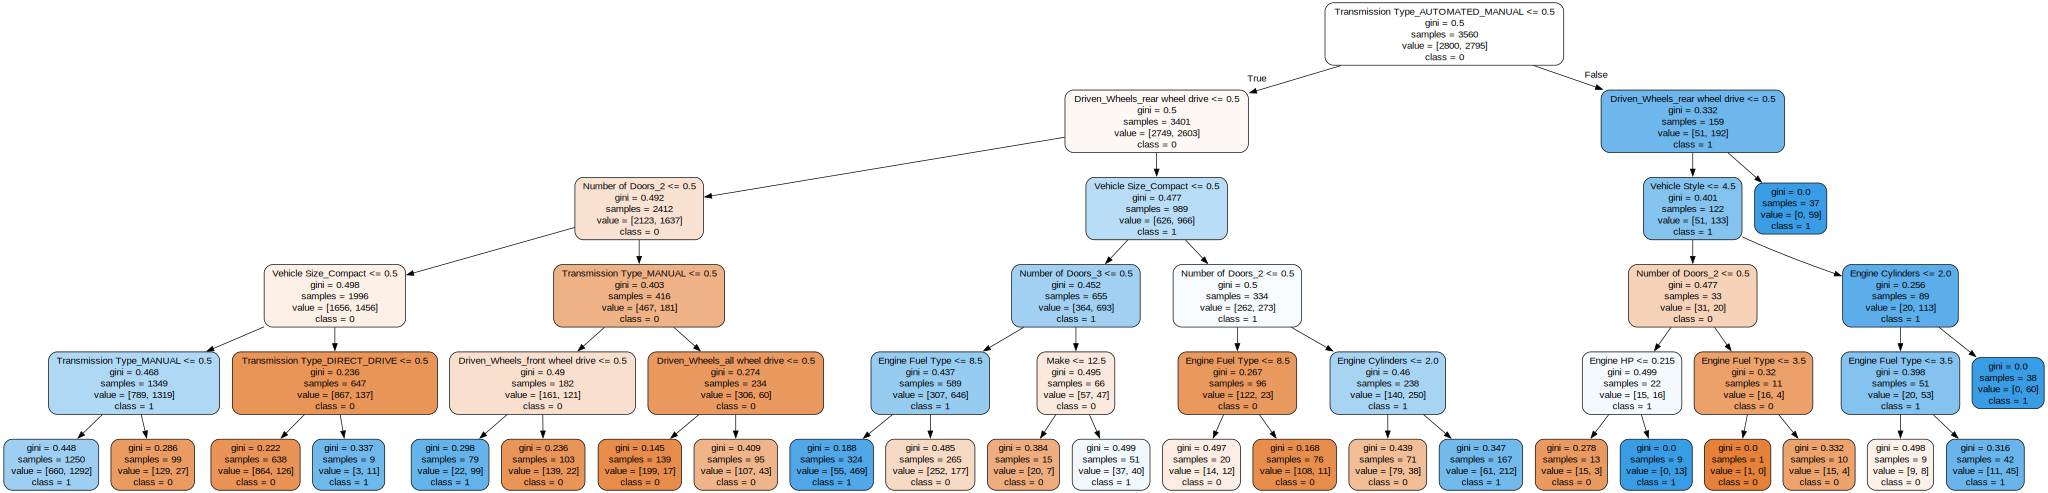

In [12]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его

dot_data = tree.export_graphviz(tree_data, out_file=None, feature_names=X.columns, class_names=['0', '1'], # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране


In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

precision, recall, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
precision, recall, thresholds

(array([0.        , 0.14351199, 1.        ]),
 array([0.        , 0.88152174, 1.        ]),
 array([inf,  1.,  0.]))

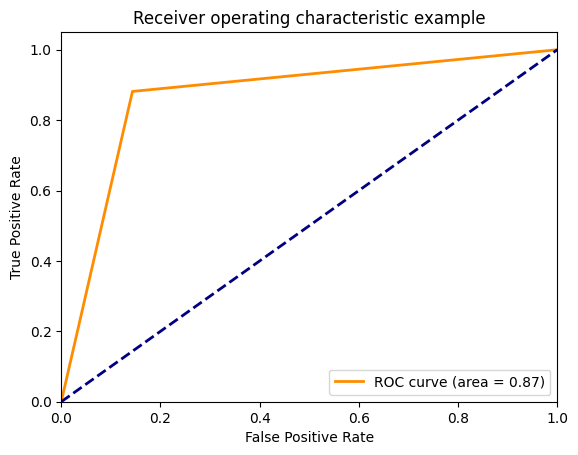

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [15]:
from sklearn import metrics
# оценка точности модели
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2836
           1       0.86      0.88      0.87      2760

    accuracy                           0.87      5596
   macro avg       0.87      0.87      0.87      5596
weighted avg       0.87      0.87      0.87      5596



In [16]:
# # разделяем на обучающие и тестовые 
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# # создаем классификатор
# clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
# # обучаем его
# clf.fit(X_train, y_train)
# # проверяем на тестовых данных
# pred = clf.predict(X_test)
# # считаем метрики
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# accuracy = accuracy_score(y_test, pred)
# f1 = f1_score(y_test, pred, average="macro")
# precision = precision_score(y_test, pred, average="macro")
# recall=recall_score(y_test, pred, average="macro")
# print('Accuracy=',accuracy)
# print('F1=',f1)
# print('Precision=',precision)
# print('Recall=',recall)
# # plot_confusion_matrix(clf,X_test, y_test)
# cm = confusion_matrix(y_test, pred, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# disp.plot()
# plt.show()

In [17]:
# # выбираем дерево из леса
# estimator = clf.estimators_[5]

# tree.plot_tree(estimator) ;
# tree_data=tree.export_graphviz(estimator, out_file=None, 
#                 feature_names=X.columns, class_names=['0', '1'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True);

# graph=graphviz.Source(tree_data,format='png');
# graph
